# BALIKESIR FIRE INCIDENTS

I am going to analyze the fire incidents that recorded in Balikesir from 2017 to 2020. I would like to examine if there are some differences between districts or are there any similarities between the incident reasons. There are plenty of similar datasets on Kaggle, such as New York City Fire Incidents, Toronto Fire Incidents etc. Even though these examples may be more comprehensive and more popular, I would like to analyze the Balikesir Municipility's data to support their open data platform. 

Balikesir fire incidents dataset includes 14 columns and 9764 rows. District, estimated damage, received reporting type, type of fire, type of reason and some informative dates of the incident are given in dataset. It covers all the reports taken from 2017 to 2020.

Balikesir is the 17th crowded city of Turkey. The total population of Balikesir is 1.2 million (2019). There are 20 districts. The top 3 most crowded districts are, Karesi, Altieylül and Bandirma. Ayvalık is mostly known as a tourist attraction district of the city. The native population is 70 thousand people however, it can be reached to 500 thousands in summers.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import time
from datetime import date
from datetime import timedelta

In [2]:
data = pd.read_excel("balikesir_fire_incidents.xls")

In [3]:
data.head()

,ID,İlçe Adı,Mahalle,Sokak,İhbar Tipi,Tahmini Zarar,Yangın Cinsi,Yangın Nedeni,Müdahale Eden Amirlik,İhbar Saati,Çıkış Tarihi,Olay Yerine Ulaşım Saati,Yangın Söndürme Saati,Geri Dönüş Saati
0,9764,KARESİ,ZİYARETLİ,NaN,YUZ_ON_IKI_CAGRI,BASLANGIC_HALINDE,Ot Yangını,Dikkatsizlik,Karesi Grup Amirliği,18.11.2017 18:54:00,18.11.2017 18:55:00,18.11.2017 19:06:00,18.11.2017 19:28:00,18.11.2017 19:42:00
1,9763,ERDEK,ZEYTİNLİ,NaN,YUZ_ON_IKI_CAGRI,BASLANGIC_HALINDE,Ot Yangını,Dikkatsizlik,Erdek Grup Amirliği,13.11.2019 15:28:00,13.11.2019 15:29:00,13.11.2019 15:33:00,13.11.2019 15:55:00,13.11.2019 16:02:00
2,9762,ERDEK,ZEYTİNLİ,NaN,YUZ_ON_IKI_CAGRI,KISMEN,Ot Yangını,Tedbirsizlik,Erdek Grup Amirliği,25.10.2019 10:58:00,25.10.2019 10:59:00,25.10.2019 11:03:00,25.10.2019 12:20:00,25.10.2019 12:25:00
3,9761,ERDEK,ZEYTİNLİ,NaN,YUZ_ON_IKI_CAGRI,BASLANGIC_HALINDE,Baca Yangını,Dikkatsizlik,Erdek Grup Amirliği,16.10.2019 18:10:00,16.10.2019 18:11:00,16.10.2019 18:15:00,16.10.2019 18:55:00,16.10.2019 19:00:00
4,9760,ERDEK,ZEYTİNLİ,NaN,YUZ_ON_IKI_CAGRI,KISMEN,Ot Yangını,Doğal Olaylar,Erdek Grup Amirliği,19.08.2019 17:03:00,19.08.2019 17:03:00,19.08.2019 17:05:00,19.08.2019 17:40:00,19.08.2019 17:45:00


In [4]:
data.dtypes

ID                            int64
İlçe Adı                     object
Mahalle                      object
Sokak                       float64
İhbar Tipi                   object
Tahmini Zarar                object
Yangın Cinsi                 object
Yangın Nedeni                object
Müdahale Eden Amirlik        object
İhbar Saati                  object
Çıkış Tarihi                 object
Olay Yerine Ulaşım Saati     object
Yangın Söndürme Saati        object
Geri Dönüş Saati             object
dtype: object

Dataset mostly contains categorical data with strings. To check the possible values that the variables could have:

In [5]:
data["Müdahale Eden Amirlik"] = data["Müdahale Eden Amirlik"].str.replace("Grup Amirliği","Gr. Amir.")

In [6]:
data["İlçe Adı"].unique()

array(['KARESİ', 'ERDEK', 'EDREMİT', 'AYVALIK', 'SAVAŞTEPE', 'BİGADİÇ',
       'SINDIRGI', 'DURSUNBEY', 'BURHANİYE', 'MARMARA', 'SUSURLUK',
       'ALTIEYLÜL', 'İVRİNDİ', 'BANDIRMA', 'MANYAS', 'BALYA', 'KEPSUT',
       'GÖNEN', 'HAVRAN', 'GÖMEÇ', nan], dtype=object)

In [7]:
data["İhbar Tipi"].unique()

array(['YUZ_ON_IKI_CAGRI', 'ASILSIZ_IHBAR', 'TAKVIYE_AMACLI', 'DIGER',
       'KONTROL'], dtype=object)

In [8]:
data["Tahmini Zarar"].unique()

array(['BASLANGIC_HALINDE', 'KISMEN', 'TAMAMEN', nan], dtype=object)

In [9]:
data["Yangın Cinsi"].unique()

array(['Ot Yangını', 'Baca Yangını', 'Asılsız İhbar', 'Araç Yangını',
       'İşyeri Yangını', 'Tedbir Amaçlı', 'Çöp Yangını', 'Ev Yangını',
       'Diğer Yangınlar', 'Bina Yangını', 'Çatı Yangını', 'Dam Yangını',
       'Elektrik Yangını', 'Yangın Zannı', 'Orman Yangını',
       'Anız Yangını', 'Saman Yangını', 'Elektrik Yangını (Mesken)',
       'Tatbikat', 'Takviye Amaçlı', 'Arazi Yangını'], dtype=object)

In [10]:
data["Yangın Nedeni"].unique()

array(['Dikkatsizlik', 'Tedbirsizlik', 'Doğal Olaylar', 'Asılsız İhbar',
       'İhmal', 'Trafik Kazası', 'Tespit Edilemedi', nan, 'Sigara',
       'Kasıt', 'Takviye Amaçlı', 'Elektrik Kontağı', 'Şüpheli',
       'Yangın Zannı', 'Gaz Kaçağı', 'Diğer', 'Akaryakıt', 'Arıza',
       'Tatbikat', 'Sabotaj'], dtype=object)

In [11]:
data["Müdahale Eden Amirlik"].unique()

array(['Karesi Gr. Amir.', 'Erdek Gr. Amir.', 'Edremit Gr. Amir.',
       'Burhaniye Gr. Amir.', 'Havran Gr. Amir.', 'Ayvalık Gr. Amir.',
       'Savaştepe Gr. Amir.', 'Bigadiç Gr. Amir.', 'Sındırgı Gr. Amir.',
       'Dursunbey Gr. Amir.', 'Marmara Gr. Amir.', 'Susurluk Gr. Amir.',
       'Merkez Gr. Amir.', 'İvrindi Gr. Amir.', 'Bandırma Gr. Amir.',
       'Manyas Gr. Amir.', 'Balya Gr. Amir.', 'Kepsut Gr. Amir.',
       'Gönen Gr. Amir.', 'Gömeç Gr. Amir.'], dtype=object)

### Data Preprocessing

There are detailed informations with the date and time of the incident. Firstly I converted them into datetime format. Then I extracted the year and month to the seperate columns for further analysis. Additionally, I added some other new columns as well to see the arrival time, extinguish time, and returning time in minutes. To convert some of the figures into minutes, I also defined a function.

In [12]:
data["İhbar Saati"]=pd.to_datetime(data["İhbar Saati"])
data["Çıkış Tarihi"]=pd.to_datetime(data["Çıkış Tarihi"])
data["Olay Yerine Ulaşım Saati"]=pd.to_datetime(data["Olay Yerine Ulaşım Saati"])
data["Yangın Söndürme Saati"]=pd.to_datetime(data["Yangın Söndürme Saati"])
data["Geri Dönüş Saati"]=pd.to_datetime(data["Geri Dönüş Saati"])

In [13]:
def calc_min(delta):
    return delta.seconds//60

In [14]:
data["Yıl"] = data["Çıkış Tarihi"].dt.year
data["Ay"] = data["Çıkış Tarihi"].dt.month
data["Çıkış Süresi"] = data["Çıkış Tarihi"] - data["İhbar Saati"]
data["Olay Yerine Ulaşım Süresi"] =data["Olay Yerine Ulaşım Saati"] - data["İhbar Saati"]
data["Olay Yerine Ulaşım Süresi"] = data["Olay Yerine Ulaşım Süresi"].apply(calc_min)
data["Geri Dönüş Süresi"] =data["Geri Dönüş Saati"] - data["Yangın Söndürme Saati"]
data["Geri Dönüş Süresi"] = data["Geri Dönüş Süresi"].apply(calc_min)
data["Çıkış Süresi"] =data["Çıkış Tarihi"] - data["İhbar Saati"]
data["Çıkış Süresi"] = data["Çıkış Süresi"].apply(calc_min)
data["Yangın Söndürme Süresi"] =data["Yangın Söndürme Saati"] - data["Olay Yerine Ulaşım Saati"]
data["Yangın Söndürme Süresi"] = data["Yangın Söndürme Süresi"].apply(calc_min)

I investigated the missing values in the dataset.
According to the missing values analysis below, "Sokak" column is all blank. Therefore I removed it.

In [15]:
miss_val = data.isnull().sum()
miss_val=miss_val.drop(miss_val[miss_val == 0].index).sort_values(ascending = False)
pd.DataFrame({'Missing Values':miss_val, 'Percent':miss_val/len(data)*100})

,Missing Values,Percent
Sokak,9764,100.000000
Geri Dönüş Süresi,194,1.986891
Yangın Söndürme Süresi,193,1.976649
Yangın Söndürme Saati,193,1.976649
Tahmini Zarar,182,1.863990
Yangın Nedeni,43,0.440393
Mahalle,26,0.266284
Olay Yerine Ulaşım Süresi,24,0.245801
Olay Yerine Ulaşım Saati,24,0.245801
Geri Dönüş Saati,18,0.184351


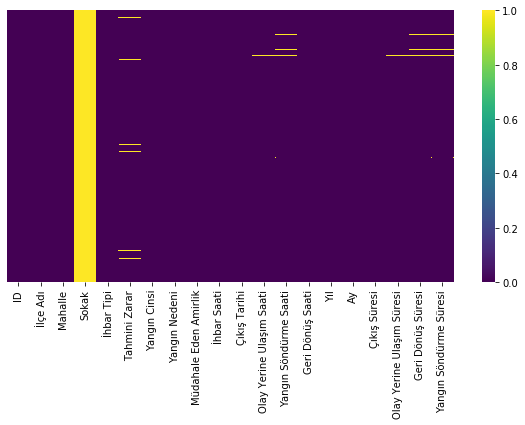

In [16]:
fig = plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(), yticklabels="", cmap="viridis")

In [17]:
data = data.drop(["Sokak"],axis= 1)

For the rest of the missing values, I followed the rules below:

- Since most of the "Yangın Nedeni" column is equal to "Asılsız İhbar" while, "Yangın Cinsi" column equals to "Asılsız İhbar", fill all the blanks for "Yangın Nedeni" when "Yangın Cinsi" columns is "Asılsız İhbar"

- If "Yangın Cinsi" value is equal to "Yangın Zannı", fill "Yangın Nedeni" missing values as "Yangın Zannı" as well.

- Fill "Tahmini Zarar" as "Hasar Yoktur", where "Yangın Cinsi" feature equals to "Asılsız İhbar"

In [18]:
data[data["Yangın Cinsi"] == "Asılsız İhbar"]["Yangın Nedeni"].value_counts()

Asılsız İhbar       520
Yangın Zannı         11
Dikkatsizlik          3
Diğer                 1
Tespit Edilemedi      1
Tedbirsizlik          1
Name: Yangın Nedeni, dtype: int64

In [19]:
data.loc[(data["Yangın Nedeni"].isna() == True) & (data["Yangın Cinsi"] == "Asılsız İhbar"),["Yangın Nedeni"]] = "Asılsız İhbar"

In [20]:
data[data["Yangın Cinsi"] == "Yangın Zannı"]["Yangın Nedeni"].value_counts()

Yangın Zannı        231
Asılsız İhbar         9
Diğer                 7
Tedbirsizlik          6
Arıza                 3
Dikkatsizlik          2
Elektrik Kontağı      2
Sigara                1
Name: Yangın Nedeni, dtype: int64

In [21]:
data.loc[(data["Yangın Nedeni"].isna() == True) & (data["Yangın Cinsi"] == "Yangın Zannı"),["Yangın Nedeni"]] = "Yangın Zannı"

In [22]:
data.loc[(data["Tahmini Zarar"].isna() == True) & (data["Yangın Cinsi"] == "Asılsız İhbar"),["Tahmini Zarar"]] = "Hasar Yoktur"

Afterwards I checked the dates. Dataset consists the years between 2017 and 2020. However, there are no consistent amount of data before October of 2017 and after February of 2020. Therefore, I only take data between these timeline into account. 

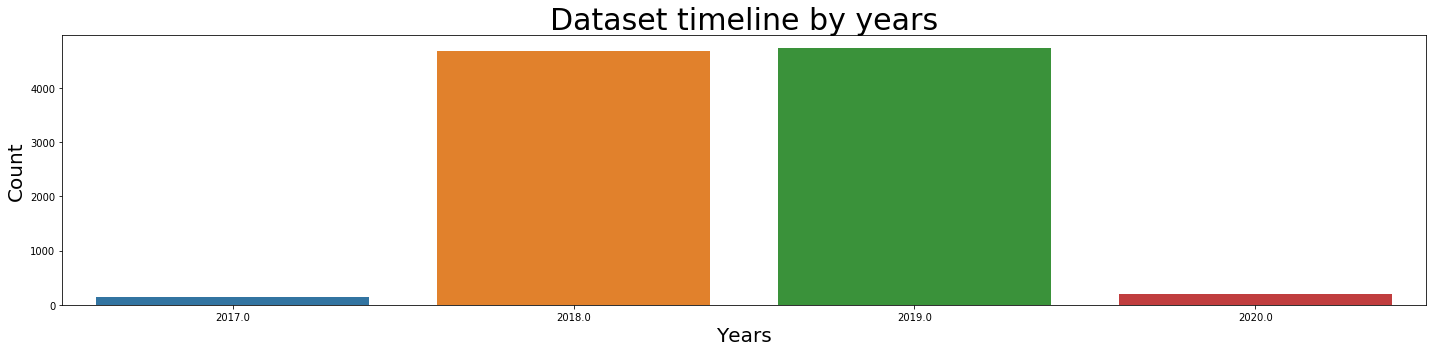

In [23]:
fig = plt.figure(figsize= (20,5))
sns.countplot(data["Yıl"])
plt.title("Dataset timeline by years", size=30)
plt.xlabel("Years", size=20)
plt.ylabel("Count", size=20)
fig.tight_layout()

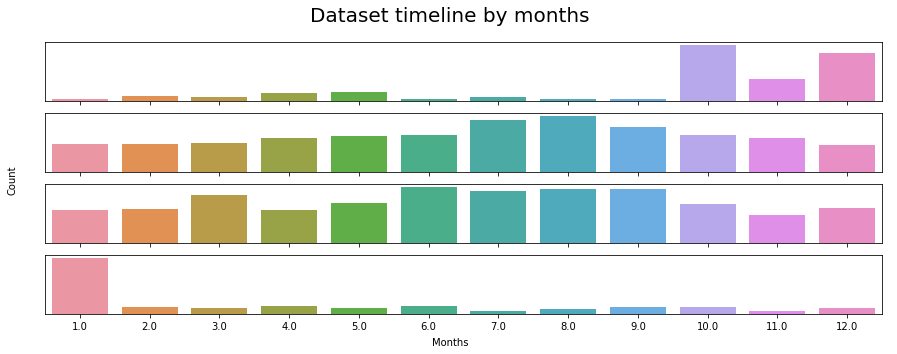

In [24]:
fig, axs = plt.subplots(4,1, figsize=(15,5), sharex=True)
fig.add_subplot(111, frameon=False)
fig.suptitle("Dataset timeline by months", size=20)
sns.countplot(ax=axs[0], x=data[data["Yıl"] == 2017]["Ay"])
sns.countplot(ax=axs[1], x=data[data["Yıl"] == 2018]["Ay"])
sns.countplot(ax=axs[2], x=data[data["Yıl"] == 2019]["Ay"])
sns.countplot(ax=axs[3], x=data[data["Yıl"] == 2020]["Ay"])
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
fig.text(0.5, 0.04, 'Months', ha='center')
fig.text(0.09, 0.5, 'Count', va='center', rotation='vertical')
for ax in axs:
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.set_yticks([])

In [25]:
data.drop(data[(data["Yıl"] == 2017) & (data["Ay"] < 10)].index, inplace = True)
data.drop(data[(data["Yıl"] == 2020) & (data["Ay"] > 1)].index, inplace = True)

As we can see, dataset still includes plenty of missing values, especially at the columns that consists the time. I filled "Yangın Söndürme Saati" column by the mean values of the extinguishing fire based on its type. For this reason, I calculated each average extinguishing time in minutes and add them to the "Olay Yerine Ulaşım Saati" column.

In [26]:
miss_val = data.isnull().sum()
miss_val=miss_val.drop(miss_val[miss_val == 0].index).sort_values(ascending = False)
pd.DataFrame({'Missing Values':miss_val, 'Percent':miss_val/len(data)*100})

,Missing Values,Percent
Geri Dönüş Süresi,188,1.954262
Yangın Söndürme Süresi,187,1.943867
Yangın Söndürme Saati,187,1.943867
Mahalle,26,0.270270
Olay Yerine Ulaşım Süresi,23,0.239085
Olay Yerine Ulaşım Saati,23,0.239085
Geri Dönüş Saati,18,0.187110
Yangın Nedeni,16,0.166320
Çıkış Süresi,14,0.145530
Ay,14,0.145530


In [27]:
cins_x = data["Yangın Cinsi"].unique().tolist()

In [28]:
#Creating a list that includes all average extinguishing time based on the type of the incident
list_x =[]
for i in cins_x:
    list_x.append(data[data["Yangın Cinsi"]==i]["Yangın Söndürme Süresi"].mean())

In [29]:
#18th column is the "Yangın Söndürme Süresi". By the code below, we can fill all the NA values by average time 
#according to their type of incident
for i in range(len(data)):
    if pd.isnull(data.iloc[i]["Yangın Söndürme Süresi"]) == True:
        data.iloc[i, 18] = list_x[cins_x.index(data.iloc[i]["Yangın Cinsi"])]

In [30]:
#Then if we add the average minutes that calculated above to "Olay Yerine Ulaşım Saati" column, we would get the 
#missing "Yangın Söndürme Saati" values.
for i in range(len(data)):
    if pd.isnull(data.iloc[i]["Yangın Söndürme Saati"]) == True:
        data.iloc[i, 11] = data.iloc[i, 10] + timedelta(minutes = data.iloc[i, 18])

In [31]:
data["Geri Dönüş Süresi"] =data["Geri Dönüş Saati"] - data["Yangın Söndürme Saati"]
data["Geri Dönüş Süresi"] = data["Geri Dönüş Süresi"].apply(calc_min)

In [32]:
miss_val = data.isnull().sum()
miss_val=miss_val.drop(miss_val[miss_val == 0].index).sort_values(ascending = False)
pd.DataFrame({'Missing Values':miss_val, 'Percent':miss_val/len(data)*100})

,Missing Values,Percent
Geri Dönüş Süresi,27,0.280665
Mahalle,26,0.270270
Olay Yerine Ulaşım Süresi,23,0.239085
Yangın Söndürme Saati,23,0.239085
Olay Yerine Ulaşım Saati,23,0.239085
Geri Dönüş Saati,18,0.187110
Yangın Nedeni,16,0.166320
Çıkış Süresi,14,0.145530
Ay,14,0.145530
Yıl,14,0.145530


Finally, since very small portion of missing values remained, I deleted all records that have NA values

In [33]:
data.dropna(inplace = True)

In [34]:
miss_val = data.isnull().sum()
miss_val=miss_val.drop(miss_val[miss_val == 0].index).sort_values(ascending = False)
pd.DataFrame({'Missing Values':miss_val, 'Percent':miss_val/len(data)*100})

,Missing Values,Percent


### Data Visualization

First I would like to show the top causes of fire. Then I will visualize the consequences of those top 3 reasons.

According to the table below, the top 3 reasons are cigarettes, lack of attention and intended fires.

Then, I would like to examine specifically the reasons of the home fires and workplace fires.

In [35]:
data["Yangın Nedeni"].value_counts()

Sigara              1825
Dikkatsizlik        1401
Kasıt               1222
Tedbirsizlik        1161
Elektrik Kontağı     915
Tespit Edilemedi     719
Asılsız İhbar        592
Doğal Olaylar        420
Diğer                305
Yangın Zannı         283
İhmal                256
Şüpheli              151
Arıza                145
Gaz Kaçağı            73
Tatbikat              22
Sabotaj               19
Trafik Kazası         14
Takviye Amaçlı        11
Akaryakıt             10
Name: Yangın Nedeni, dtype: int64

In [36]:
data["Yangın Cinsi"].value_counts()

Ot Yangını                   3071
Çöp Yangını                  2151
Ev Yangını                    741
Araç Yangını                  574
Asılsız İhbar                 550
Baca Yangını                  459
Diğer Yangınlar               361
Yangın Zannı                  258
İşyeri Yangını                218
Anız Yangını                  217
Orman Yangını                 181
Elektrik Yangını              170
Çatı Yangını                  123
Dam Yangını                   115
Tedbir Amaçlı                 114
Saman Yangını                  90
Elektrik Yangını (Mesken)      65
Bina Yangını                   59
Tatbikat                       17
Arazi Yangını                   8
Takviye Amaçlı                  2
Name: Yangın Cinsi, dtype: int64

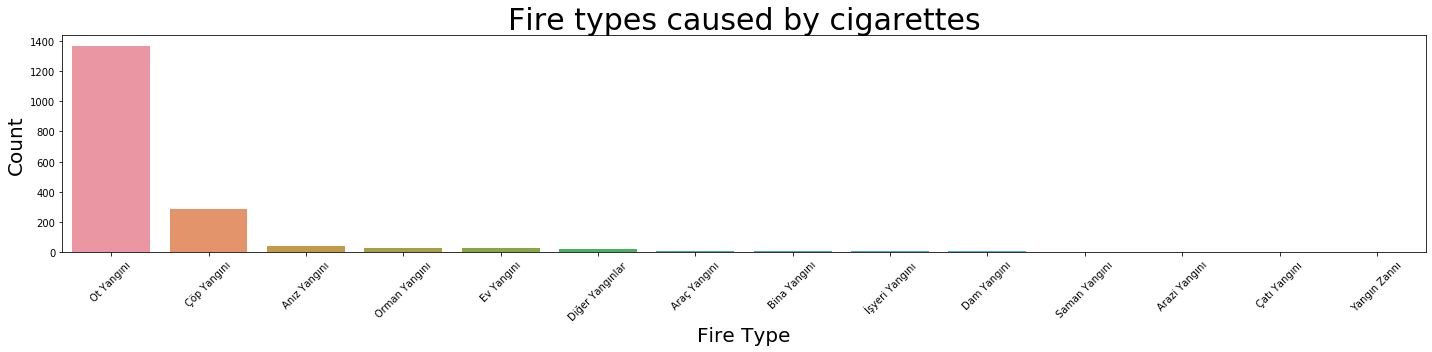

In [37]:
fig = plt.figure(figsize= (20,5))
sns.countplot(data[data["Yangın Nedeni"] == "Sigara"]["Yangın Cinsi"], order = data[data["Yangın Nedeni"] == "Sigara"]["Yangın Cinsi"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Fire types caused by cigarettes", size=30)
plt.xlabel("Fire Type", size=20)
plt.ylabel("Count", size=20)
fig.tight_layout()

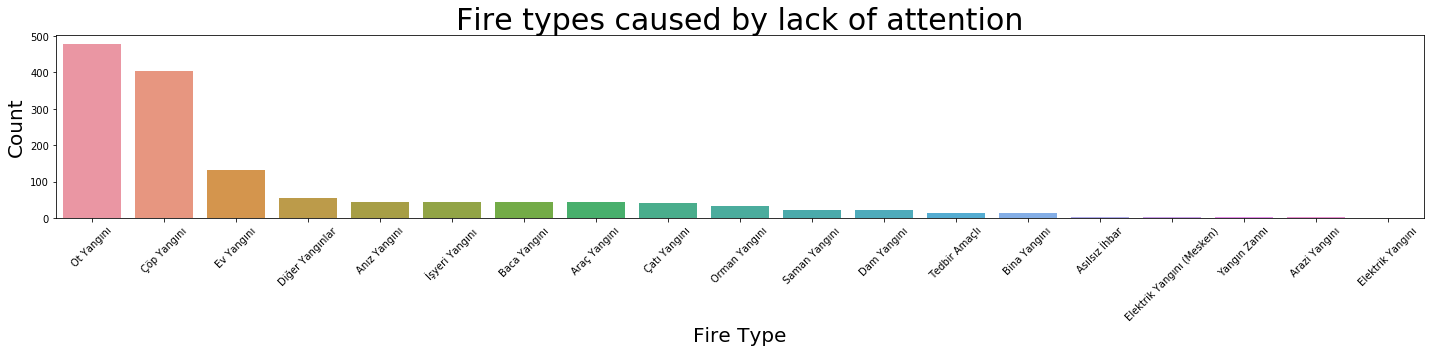

In [38]:
fig = plt.figure(figsize= (20,5))
sns.countplot(data[data["Yangın Nedeni"] == "Dikkatsizlik"]["Yangın Cinsi"], order = data[data["Yangın Nedeni"] == "Dikkatsizlik"]["Yangın Cinsi"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Fire types caused by lack of attention", size=30)
plt.xlabel("Fire Type", size=20)
plt.ylabel("Count", size=20)
fig.tight_layout()

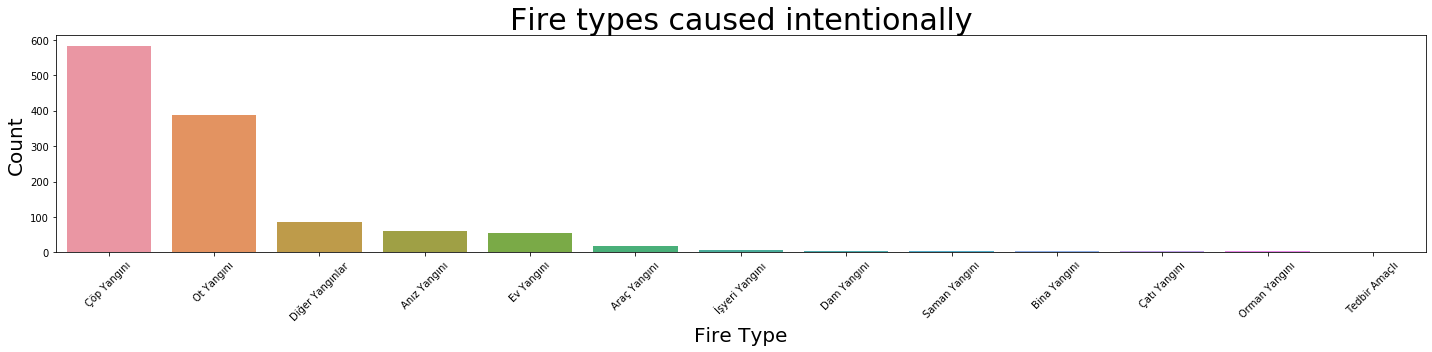

In [39]:
fig = plt.figure(figsize= (20,5))
sns.countplot(data[data["Yangın Nedeni"] == "Kasıt"]["Yangın Cinsi"], order = data[data["Yangın Nedeni"] == "Kasıt"]["Yangın Cinsi"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Fire types caused intentionally", size=30)
plt.xlabel("Fire Type", size=20)
plt.ylabel("Count", size=20)
fig.tight_layout()

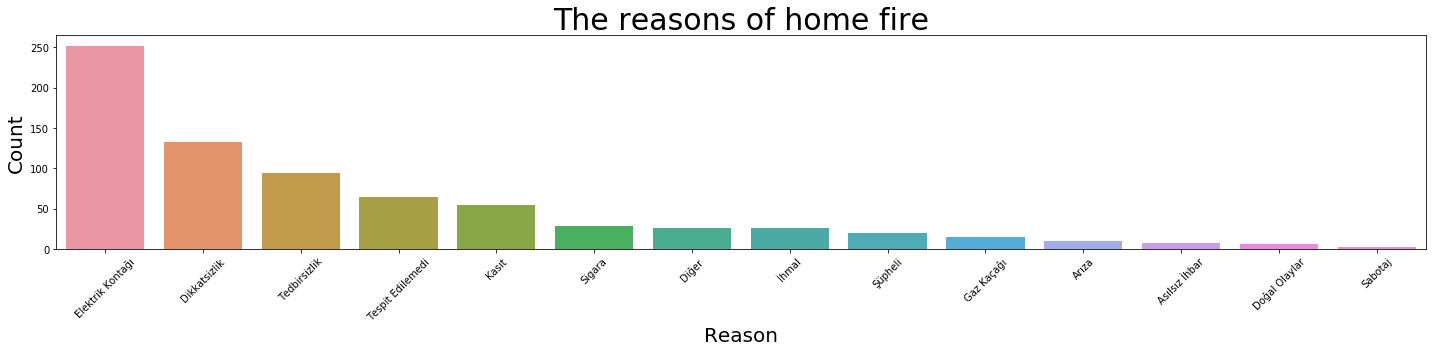

In [40]:
fig = plt.figure(figsize= (20,5))
sns.countplot(data[data["Yangın Cinsi"] == "Ev Yangını"]["Yangın Nedeni"], order = data[data["Yangın Cinsi"] == "Ev Yangını"]["Yangın Nedeni"].value_counts().index)
plt.xticks(rotation=45)
plt.title("The reasons of home fire", size=30)
plt.xlabel("Reason", size=20)
plt.ylabel("Count", size=20)
fig.tight_layout()

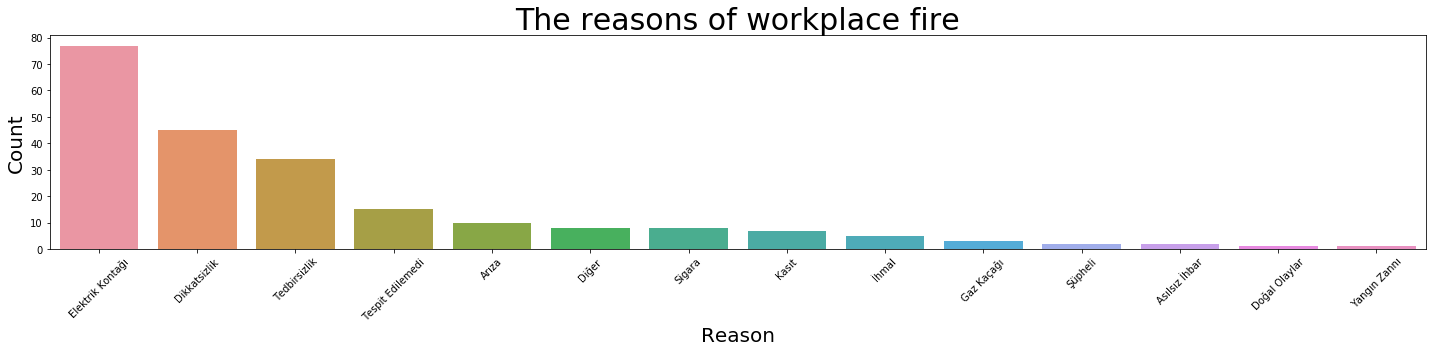

In [41]:
fig = plt.figure(figsize= (20,5))
sns.countplot(data[data["Yangın Cinsi"] == "İşyeri Yangını"]["Yangın Nedeni"], order = data[data["Yangın Cinsi"] == "İşyeri Yangını"]["Yangın Nedeni"].value_counts().index)
plt.xticks(rotation=45)
plt.title("The reasons of workplace fire", size=30)
plt.xlabel("Reason", size=20)
plt.ylabel("Count", size=20)
fig.tight_layout()

Some of the takeaways regarding the graphs above:

- "Ot Yangını" and "Çöp Yangını" are most seen cases.

- Especially electrical issues and lack of attention causes home fires.

- People mostly tend to set on fire the trashes, which is still common at suburbs or villages.

- Home fires and workplace fires have common reasons, such as electrical contact or inattention or imprudence.

- Intentional home fires can be seen quite often.

### Data Analysis

At the beginning, I analyzed the average duration of all steps of an incident. Then I checked the districts that take the longest to arrive and the fire types the hardest to extinguish and sorted them by their total number of recorded cases.

In [42]:
print('Average leaving time: %d minutes' %(data["Çıkış Süresi"].mean()))
print('Average arrival time: %d minutes' %(data["Olay Yerine Ulaşım Süresi"].mean()))
print('Average extinguishing time: %d minutes' %(data["Yangın Söndürme Süresi"].mean()))
print('Average returning time: %d minutes' %(data["Geri Dönüş Süresi"].mean()))

Average leaving time: 2 minutes
Average arrival time: 7 minutes
Average extinguishing time: 39 minutes
Average returning time: 22 minutes


In [43]:
data.groupby("İlçe Adı").agg({"Olay Yerine Ulaşım Süresi": "mean", "İlçe Adı": "count"}).round(0).rename(columns={"Olay Yerine Ulaşım Süresi":"Ortalama Olay Yerine Ulaşım Süresi", "İlçe Adı": "Olay Sayısı"}).sort_values("Olay Sayısı", ascending=False)

,Ortalama Olay Yerine Ulaşım Süresi,Olay Sayısı
İlçe Adı,,
EDREMİT,5.0,1517
BANDIRMA,6.0,1359
AYVALIK,5.0,1190
ALTIEYLÜL,10.0,955
BURHANİYE,5.0,861
KARESİ,7.0,649
GÖNEN,9.0,385
SUSURLUK,9.0,336
HAVRAN,10.0,318


In [44]:
data.groupby("Yangın Cinsi").agg({"Yangın Söndürme Süresi": "mean", "Yangın Cinsi": "count"}).round(0).rename(columns = {"Yangın Söndürme Süresi":"Ortalama Söndürme Süresi", "Yangın Cinsi":"Yangın Türü"}).sort_values("Yangın Türü", ascending=False)

,Ortalama Söndürme Süresi,Yangın Türü
Yangın Cinsi,,
Ot Yangını,38.0,3071
Çöp Yangını,42.0,2151
Ev Yangını,45.0,741
Araç Yangını,30.0,574
Asılsız İhbar,15.0,550
Baca Yangını,32.0,459
Diğer Yangınlar,32.0,361
Yangın Zannı,18.0,258
İşyeri Yangını,53.0,218


The heatmap below illustrates the percentages of fire types by districts. At a glance the significant points are:

- Most of the false calls are made at Ayvalik and Bandirma

- Most of the land fires are recorded at Erdek and Bigadic

- Most of the forest fires are recorded at Ayvalik

- Drills are only occured at Altieylül or Bandirma

In [45]:
ilce_yangin = pd.crosstab(data["İlçe Adı"], data["Yangın Cinsi"], values=data["Yangın Cinsi"], aggfunc="count", margins=False, normalize="columns")*100
ilce_yangin.fillna(0, inplace = True)
ilce_yangin = ilce_yangin.round(2)
ilce_yangin = ilce_yangin.transpose()

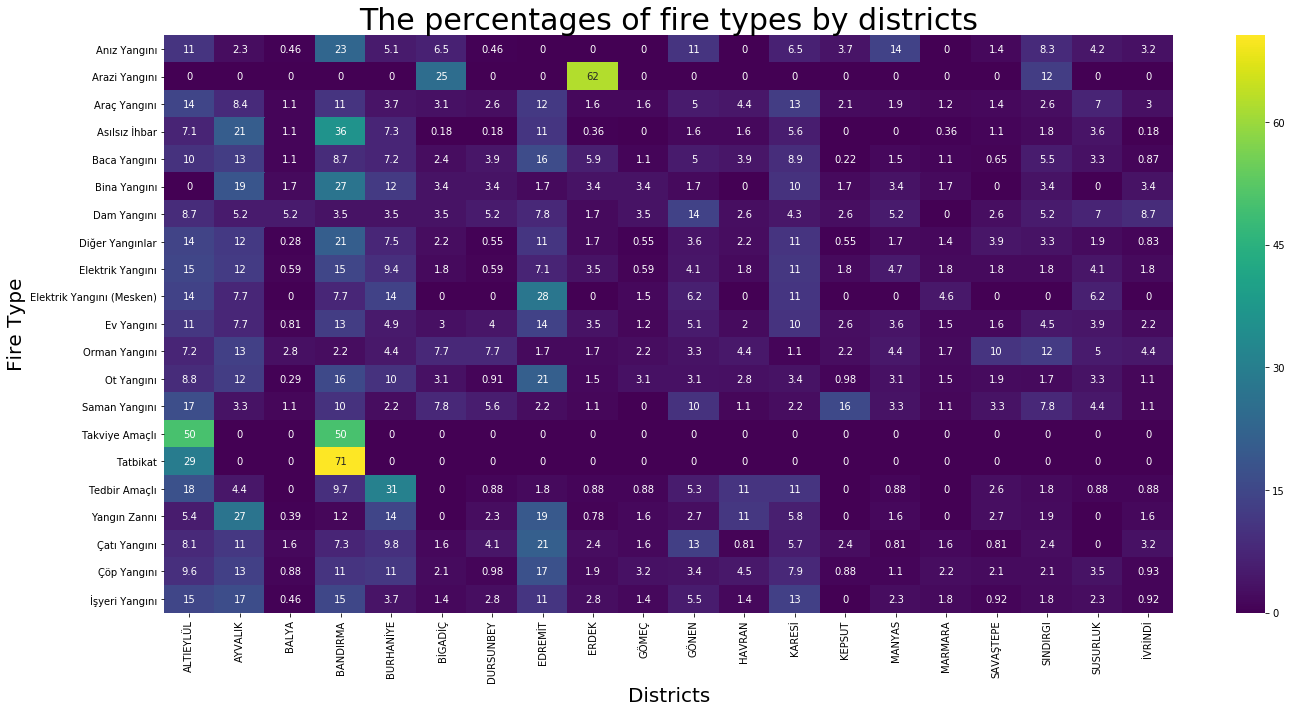

In [46]:
fig=plt.figure(figsize=(20,10))
sns.heatmap(ilce_yangin,cmap="viridis", annot=True)
plt.title("The percentages of fire types by districts", size=30)
plt.xlabel("Districts", size=20)
plt.ylabel("Fire Type", size=20)
fig.tight_layout()

For the further analyzing, I merged the populations of the districts to the dataset. I would like to investigate, if the population effects the density of the fire incidents or not? And does it also effects the occurance of the some of the fire types at certain districts?

In [47]:
nufus = pd.read_excel("Balikesir_ilce_nufus_2019.xlsx", encoding = 'utf-8')
nufus_2019 = nufus[["İlçe", "2019 nüfusu"]]
data_merge = data.merge(nufus_2019,how="left", left_on='İlçe Adı', right_on ='İlçe')
data_merge.drop("İlçe", inplace=True, axis = 1)

In [48]:
data_merge.head()

,ID,İlçe Adı,Mahalle,İhbar Tipi,Tahmini Zarar,Yangın Cinsi,Yangın Nedeni,Müdahale Eden Amirlik,İhbar Saati,Çıkış Tarihi,Olay Yerine Ulaşım Saati,Yangın Söndürme Saati,Geri Dönüş Saati,Yıl,Ay,Çıkış Süresi,Olay Yerine Ulaşım Süresi,Geri Dönüş Süresi,Yangın Söndürme Süresi,2019 nüfusu
0,9764,KARESİ,ZİYARETLİ,YUZ_ON_IKI_CAGRI,BASLANGIC_HALINDE,Ot Yangını,Dikkatsizlik,Karesi Gr. Amir.,2017-11-18 18:54:00,2017-11-18 18:55:00,2017-11-18 19:06:00,2017-11-18 19:28:00,2017-11-18 19:42:00,2017.0,11.0,1.0,12.0,14.0,22.0,183084
1,9763,ERDEK,ZEYTİNLİ,YUZ_ON_IKI_CAGRI,BASLANGIC_HALINDE,Ot Yangını,Dikkatsizlik,Erdek Gr. Amir.,2019-11-13 15:28:00,2019-11-13 15:29:00,2019-11-13 15:33:00,2019-11-13 15:55:00,2019-11-13 16:02:00,2019.0,11.0,1.0,5.0,7.0,22.0,32120
2,9762,ERDEK,ZEYTİNLİ,YUZ_ON_IKI_CAGRI,KISMEN,Ot Yangını,Tedbirsizlik,Erdek Gr. Amir.,2019-10-25 10:58:00,2019-10-25 10:59:00,2019-10-25 11:03:00,2019-10-25 12:20:00,2019-10-25 12:25:00,2019.0,10.0,1.0,5.0,5.0,77.0,32120
3,9761,ERDEK,ZEYTİNLİ,YUZ_ON_IKI_CAGRI,BASLANGIC_HALINDE,Baca Yangını,Dikkatsizlik,Erdek Gr. Amir.,2019-10-16 18:10:00,2019-10-16 18:11:00,2019-10-16 18:15:00,2019-10-16 18:55:00,2019-10-16 19:00:00,2019.0,10.0,1.0,5.0,5.0,40.0,32120
4,9760,ERDEK,ZEYTİNLİ,YUZ_ON_IKI_CAGRI,KISMEN,Ot Yangını,Doğal Olaylar,Erdek Gr. Amir.,2019-08-19 17:03:00,2019-08-19 17:03:00,2019-08-19 17:05:00,2019-08-19 17:40:00,2019-08-19 17:45:00,2019.0,8.0,0.0,2.0,5.0,35.0,32120


As mentioned at the top, Karesi is the most crowded district of Balikesir. However, most of the incidents are seen at Edremit. Additionally, despite the fact that Ayvalik is the 6th crowded city of Balikesir, after Edremit and Bandirma, most of the cases are recorded here.

In [49]:
data_yogunluk = data_merge.groupby("İlçe Adı").agg({"2019 nüfusu": "mean", "ID": "count"})
data_yogunluk.rename(columns={"2019 nüfusu":"2019 Nüfus", "ID":"İhbar Sayısı"}, inplace=True)
data_yogunluk

,2019 Nüfus,İhbar Sayısı
İlçe Adı,,
ALTIEYLÜL,181286,955
AYVALIK,70720,1190
BALYA,12932,71
BANDIRMA,156787,1359
BURHANİYE,60490,861
BİGADİÇ,49926,252
DURSUNBEY,35122,162
EDREMİT,155837,1517
ERDEK,32120,187


I would like to sum up the relationship between population and incident numbers by the table below. 

- "Yogunluk" represents number of people per call. Since Karesi is the most crowded district, it has the biggest density. On the other hand Dursunbey have the second biggest density, even though there is one of the least crowded districts.

- "Nüfus_yüzde" and "İhbar_yüzde" represent the percentages of the population and recorded cases respectively by districts. Karesi have almost 15% of the all population, but the percentage of calls is only 6.8%

- While only approximately 6% of the population live in Ayvalik, 12.5% of the all cases are recorded here. I assume the reason is being a touristic district and the number of people is multiplying especially in summers.

- There is strong relationship between population and incident numbers according to the correlation table as well.

In [50]:
data_yogunluk["Yogunluk"] = (data_yogunluk["2019 Nüfus"]/data_yogunluk["İhbar Sayısı"]).round(2)
data_yogunluk["Nüfus_yüzde"] = ((data_yogunluk["2019 Nüfus"]/(data_yogunluk["2019 Nüfus"].sum()))*100).round(2)
data_yogunluk["İhbar_yüzde"] = ((data_yogunluk["İhbar Sayısı"]/(data_yogunluk["İhbar Sayısı"].sum()))*100).round(2)
data_yogunluk = data_yogunluk.sort_values("İhbar_yüzde", ascending=False)
data_yogunluk

,2019 Nüfus,İhbar Sayısı,Yogunluk,Nüfus_yüzde,İhbar_yüzde
İlçe Adı,,,,,
EDREMİT,155837,1517,102.73,12.68,15.89
BANDIRMA,156787,1359,115.37,12.76,14.24
AYVALIK,70720,1190,59.43,5.76,12.47
ALTIEYLÜL,181286,955,189.83,14.76,10.01
BURHANİYE,60490,861,70.26,4.92,9.02
KARESİ,183084,649,282.10,14.90,6.80
GÖNEN,74183,385,192.68,6.04,4.03
SUSURLUK,38704,336,115.19,3.15,3.52
HAVRAN,27857,318,87.60,2.27,3.33


In [51]:
correlation=data_yogunluk.corr()
correlation

,2019 Nüfus,İhbar Sayısı,Yogunluk,Nüfus_yüzde,İhbar_yüzde
2019 Nüfus,1.000000,0.792737,0.291393,1.000000,0.792796
İhbar Sayısı,0.792737,1.000000,-0.232326,0.792754,1.000000
Yogunluk,0.291393,-0.232326,1.000000,0.291300,-0.232199
Nüfus_yüzde,1.000000,0.792754,0.291300,1.000000,0.792813
İhbar_yüzde,0.792796,1.000000,-0.232199,0.792813,1.000000


### Conclusion

If we put it in a nutshell, fire incidents generally could be easily avoided with a little more attention. Most of the time, a cigarette litter or neglected electric line could give such disastrous results. Taking more precautions at the districts that getting crowded only for certain seasons, could reduce the number of cases in my opinion. The analysis shows that, fire departments have outstanding effort to reach to the fire zone as soon as possible. It only takes less than 10 minutes to reach to the incident area after notice is received. For the further analysis, the seasonality effect, if there are differences for the fire types or at the districts based on the season could be researched as well. Additionally, predicting the next fire zone's location or the fire types could have great benefits to take precautions and fighting against fire in advance.

### References

https://acikveri.balikesir.bel.tr/Veriler/VeriSetiTabloGorunum?vsadi=itfaiye-cagri-mudahale

https://tr.wikipedia.org/wiki/Bal%C4%B1kesir%27in_il%C3%A7eleri